# Clean and reformat the raw data from TCOLE describing the number of officers in each agency

* Input: `TCOLE_LicensedOfficers.xlsx`
* Output: `licensed_officers_by_agency.csv`

## Configuration

In [1]:
DTW_PROJECT_KEY = 'tji/auxiliary-datasets'
RAW_DATAFRAME_NAME = 'tcole_licensedofficers'
CLEANED_FILENAME = 'licensed_officers_by_agency.csv'

## Run

In [2]:
####################################################
# Boilerplate import/setup code for general analysis
# everett.wetchler@gmail.com
####################################################

import datetime as dt
import os
import random

import datadotworld as dw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

## Jupyter setup
%matplotlib inline
# Print any variable that is executed on its own line
# (not just if its last in a cell)
# Uncomment to use.
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

## Graphical setup
# Useful colors to reference
SNS_BLUE, SNS_GREEN, SNS_RED, SNS_PURPLE, SNS_YELLOW, SNS_CYAN = sns.color_palette()
SNS_COLORS = sns.color_palette()
# sns.set_palette(sns.color_palette("cubehelix", 8))
pd.set_option('display.max_columns', 500)
plt.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

# Watermark extension to print version/system information
# Flags:
# -a [author] -d (date) -t (time) -z (timezone) -r (repo)
# -g (git hash) -w (watermark version) -p [packages] (package info)
%load_ext watermark
%watermark -a "Everett Wetchler" -d -t -z -r -g -w -p datadotworld,numpy,pandas

####################################################
# END Boilerplate
####################################################

Everett Wetchler 2018-04-28 13:39:04 CDT

datadotworld 1.6.0
numpy 1.14.2
pandas 0.20.1
Git hash: 8055d0f891b88839feca3662a6801386516c6a52
Git repo: git@github.com:texas-justice-initiative/data-processing.git
watermark 1.5.0


In [3]:
datasets = dw.load_dataset(DTW_PROJECT_KEY, force_update=True)
df = datasets.dataframes[RAW_DATAFRAME_NAME]
df.head()

,department_name,county_name,july_1st_2016,dec_31st_2016,july_1st_2017,dec_31st_2017
0,PALESTINE CITY MARSHAL'S OFFICE,ANDERSON,0,0,0,1
1,ANGELINA CO. DIST. ATTY'S OFFICE,ANGELINA,0,0,1,1
2,ARCHER CO. CONST. PCT. 3,ARCHER,0,0,0,0
3,287th District Attorney's Office,BAILEY,0,0,0,0
4,BELTON FIRE MARSHAL'S OFFICE,BELL,0,0,0,0


In [4]:
df.columns = ['agency', 'county',
              'num_officers_2016_07_01', 'num_officers_2016_12_31',
              'num_officers_2017_07_01', 'num_officers_2017_12_31']
df['agency'] = df['agency'].apply(lambda d: d.strip().upper())
df['county'] = df['county'].apply(lambda d: d.strip().upper())
df.head()

,agency,county,num_officers_2016_07_01,num_officers_2016_12_31,num_officers_2017_07_01,num_officers_2017_12_31
0,PALESTINE CITY MARSHAL'S OFFICE,ANDERSON,0,0,0,1
1,ANGELINA CO. DIST. ATTY'S OFFICE,ANGELINA,0,0,1,1
2,ARCHER CO. CONST. PCT. 3,ARCHER,0,0,0,0
3,287TH DISTRICT ATTORNEY'S OFFICE,BAILEY,0,0,0,0
4,BELTON FIRE MARSHAL'S OFFICE,BELL,0,0,0,0


In [5]:
# At least one department had a typo, using Sheriff''s instead of Sheriff's
df['agency'] = df['agency'].str.replace("''", "'")

In [6]:
# State-level police agencies show up as Travis county,
# but they should not be counted as such in county-level
# analyses. So we create a special STATE county for them.
exceptions = [
    'CENTRAL TEXAS POLICE DEPT.',
    'CONCORDIA UNIVERSITY TEXAS POLICE DEPARTMENT',
    'UNIV. OF TEXAS SYSTEM POLICE',
]
is_state = (
    df.agency.str.contains('TEXAS')
    & (df.county == 'TRAVIS')
    & ~df.agency.isin(exceptions))
df.loc[is_state, 'county'] = 'STATE'
df[df['county'] == 'STATE']

,agency,county,num_officers_2016_07_01,num_officers_2016_12_31,num_officers_2017_07_01,num_officers_2017_12_31
81,TEXAS COMM. ON JAIL STANDARDS,STATE,0,0,0,0
1189,TEXAS RACING COMMISSION,STATE,4,5,5,5
1204,TEXAS JUVENILE JUSTICE DEPARTMENT,STATE,4,4,4,4
1432,TEXAS LOTTERY COMMISSION,STATE,7,7,7,7
1573,TEXAS STATE BOARD OF PHARMACY,STATE,8,7,7,6
1738,TEXAS STATE BOARD OF DENTAL EXAMINERS,STATE,10,12,4,2
2076,TEXAS COMMISSION ON LAW ENFORCEMENT,STATE,19,20,21,19
2077,TEXAS COMPTROLLER OF PUBLIC ACCOUNTS,STATE,19,22,21,24
2156,TEXAS JUVENILE JUSTICE DEPARTMENT - OIG,STATE,22,20,24,23
2275,TEXAS DEPT. OF INSURANCE FRAUD UNIT,STATE,29,30,26,25


#### Note the last line - Texas DPS - which includes Texas Highway Patrol. It's by far the bulk of the state department force.

In [7]:
print("Texas has %d police agencies\n - %d of them had zero officers at the end of 2017\n - %d had 1+ officers at the end of 2017" % (
    len(df), (df['num_officers_2017_12_31'] == 0).sum(), (df['num_officers_2017_12_31'] > 0).sum()))

Texas has 2703 police agencies
 - 123 of them had zero officers at the end of 2017
 - 2580 had 1+ officers at the end of 2017


## Write

In [8]:
with dw.open_remote_file(DTW_PROJECT_KEY, CLEANED_FILENAME) as w:
    print("Writing to data.world:", CLEANED_FILENAME)
    df.to_csv(w, index=False)

Writing to data.world: licensed_officers_by_agency.csv


# A few exploratory plots

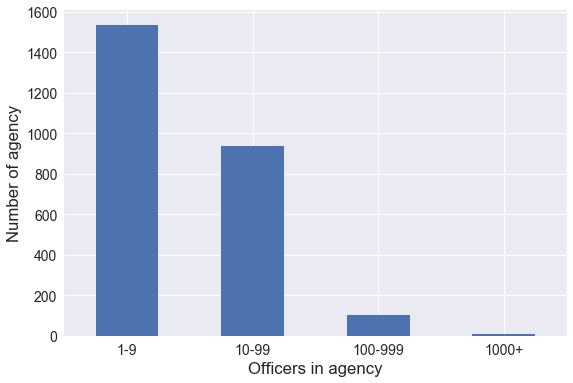

In [9]:
fig, ax = plt.subplots(1)

log_officers = df[df['num_officers_2017_12_31'] > 0]['num_officers_2017_12_31'].apply(np.log10).apply(np.floor)
log_officers.value_counts().sort_index().plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
ax.set_xticklabels(["1-9", "10-99", "100-999", "1000+"])
ax.set_xlabel("Officers in agency")
ax.set_ylabel("Number of agency")
pass